<a href="https://colab.research.google.com/github/PratyushPriyamKuanr271776508/pwskills_ensemble/blob/main/Ensemble_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Can we use Bagging for regression problems?**  
   Yes, Bagging can be used for regression problems. Scikit-learn provides BaggingRegressor which works similarly to BaggingClassifier but for regression tasks.

2. **What is the difference between multiple model training and single model training?**  
   Multiple model training (ensemble) combines predictions from several models to improve accuracy and robustness, while single model training relies on one model which may be more prone to overfitting or bias.

3. **Explain the concept of feature randomness in Random Forest.**  
   Random Forest introduces feature randomness by selecting a random subset of features at each split when building trees. This decorrelates the trees and improves generalization.

4. **What is OOB (Out-of-Bag) Score?**  
   OOB score is an estimate of model accuracy using samples not included in the bootstrap sample for a particular tree. It's calculated as the average prediction error for each training sample using only trees that didn't have that sample in their bootstrap.

5. **How can you measure the importance of features in a Random Forest model?**  
   Feature importance can be measured by:
   - Mean decrease in impurity (Gini importance)
   - Permutation importance (scoring decrease when feature values are shuffled)
   In sklearn: model.feature_importances_

6. **Explain the working principle of a Bagging Classifier.**  
   1. Creates multiple subsets of training data via bootstrap sampling  
   2. Trains a base classifier on each subset  
   3. Combines predictions through majority voting (classification) or averaging (regression)

7. **How do you evaluate a Bagging Classifier's performance?**  
   Same as other classifiers:
   - Accuracy, precision, recall, F1 score
   - Confusion matrix
   - ROC-AUC curve
   - Cross-validation
   - OOB score (if available)

8. **How does a Bagging Regressor work?**  
   1. Creates multiple bootstrap samples of training data  
   2. Trains a base regressor on each sample  
   3. Combines predictions by averaging the outputs

9. **What is the main advantage of ensemble techniques?**  
   They typically provide better predictive performance than single models by reducing variance (bagging) or bias (boosting), and are more robust to overfitting.

10. **What is the main challenge of ensemble methods?**  
    Main challenges include:
    - Increased computational complexity
    - Reduced interpretability
    - Potential memory overhead
    - Longer training times

11. **Explain the key idea behind ensemble techniques.**  
    Combine multiple weak learners to create a strong learner that performs better than any individual model, leveraging the "wisdom of crowds" principle.

12. **What is a Random Forest Classifier?**  
    An ensemble method that builds multiple decision trees using bootstrap samples and feature subset selection, then combines predictions through majority voting.

13. **What are the main types of ensemble techniques?**  
    1. Bagging (e.g., Random Forest)  
    2. Boosting (e.g., AdaBoost, Gradient Boosting)  
    3. Stacking (meta-model learns to combine base models)

14. **What is ensemble learning in machine learning?**  
    A technique that combines multiple machine learning models to improve predictive performance compared to using any single model alone.

15. **When should we avoid using ensemble methods?**  
    1. When interpretability is crucial  
    2. With very large datasets (computational cost)  
    3. When simple models already perform well  
    4. Under strict latency constraints

16. **How does Bagging help in reducing overfitting?**  
    By averaging multiple models trained on different data subsets, bagging reduces variance and smooths out predictions, making the model less sensitive to noise in training data.

17. **Why is Random Forest better than a single Decision Tree?**  
    1. Reduces overfitting through ensemble averaging  
    2. Handles noise better  
    3. Provides feature importance  
    4. Generally more accurate and stable

18. **What is the role of bootstrap sampling in Bagging?**  
    Bootstrap sampling creates diversity among base learners by:
    1. Allowing each model to see slightly different data  
    2. Enabling OOB error estimation  
    3. Ensuring some samples are left out for each model

19. **What are some real-world applications of ensemble techniques?**  
    1. Fraud detection (Random Forest)  
    2. Medical diagnosis (Gradient Boosting)  
    3. Recommendation systems  
    4. Financial risk assessment  
    5. Image classification

20. **What is the difference between Bagging and Boosting?**  
    **Bagging:**  
    - Parallel training of independent models  
    - Reduces variance  
    - Bootstrap samples  
    - Equal weight to all models  
    
    **Boosting:**  
    - Sequential training correcting previous errors  
    - Reduces bias  
    - Weighted samples  
    - More weight to better performing models

In [ ]:
## Import necessary libraries
from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Create sample datasets
# Classification dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=15, n_informative=10, noise=5, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

In [ ]:
# 21. Train a Bagging Classifier using Decision Trees
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_clf.fit(X_train_clf, y_train_clf)
y_pred = bag_clf.predict(X_test_clf)
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test_clf, y_pred):.4f}")

# 22. Train a Bagging Regressor using Decision Trees
bag_reg = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bag_reg.fit(X_train_reg, y_train_reg)
y_pred = bag_reg.predict(X_test_reg)
print(f"Bagging Regressor MSE: {mean_squared_error(y_test_reg, y_pred):.4f}")

# 23. Random Forest Classifier on Breast Cancer dataset with feature importance
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cancer, y_train_cancer)
importances = rf_clf.feature_importances_
feature_names = cancer.feature_names
print("Feature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

# 24. Compare Random Forest Regressor with single Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
dt_pred = dt_reg.predict(X_test_reg)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
rf_pred = rf_reg.predict(X_test_reg)

print(f"Decision Tree MSE: {mean_squared_error(y_test_reg, dt_pred):.4f}")
print(f"Random Forest MSE: {mean_squared_error(y_test_reg, rf_pred):.4f}")

# 25. Compute OOB Score for Random Forest Classifier
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X_train_clf, y_train_clf)
print(f"OOB Score: {rf_clf_oob.oob_score_:.4f}")

# 26. Bagging Classifier using SVM as base estimator
bag_svm = BaggingClassifier(
    SVC(),
    n_estimators=10,
    random_state=42
)
bag_svm.fit(X_train_clf, y_train_clf)
y_pred = bag_svm.predict(X_test_clf)
print(f"SVM Bagging Accuracy: {accuracy_score(y_test_clf, y_pred):.4f}")

# 27. Random Forest with different numbers of trees
for n_trees in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train_clf, y_train_clf)
    y_pred = rf.predict(X_test_clf)
    print(f"Accuracy with {n_trees} trees: {accuracy_score(y_test_clf, y_pred):.4f}")

# 28. Bagging Classifier using Logistic Regression
bag_lr = BaggingClassifier(
    LogisticRegression(max_iter=1000),
    n_estimators=50,
    random_state=42
)
bag_lr.fit(X_train_clf, y_train_clf)
y_pred = bag_lr.predict(X_test_clf)
y_proba = bag_lr.predict_proba(X_test_clf)[:, 1]
print(f"Logistic Regression Bagging AUC: {roc_auc_score(y_test_clf, y_proba):.4f}")

# 29. Random Forest Regressor feature importance
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
importances = rf_reg.feature_importances_
print("Regression Feature Importances:")
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance:.4f}")

# 30. Compare Bagging and Random Forest
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag_clf.fit(X_train_clf, y_train_clf)
bag_pred = bag_clf.predict(X_test_clf)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
rf_pred = rf_clf.predict(X_test_clf)

print(f"Bagging Accuracy: {accuracy_score(y_test_clf, bag_pred):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test_clf, rf_pred):.4f}")

Bagging Classifier Accuracy: 0.8967
Bagging Regressor MSE: 4718.4527
Feature Importances:
mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069
Decision Tree MSE: 12182.7227
Random Forest MSE: 4593.6029
OOB Score: 0.8814
SVM Bagging Accuracy: 0.9200
Accuracy with 10 trees: 0.8333
Accuracy with 50 trees: 0.8900
Accuracy with 100

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.9522468354430378
MSE with 10 estimators: 5885.0919
MSE with 50 estimators: 4718.4527
MSE with 100 estimators: 4604.1951
MSE with 200 estimators: 4411.3456
Number of misclassified samples: 5
Indices of misclassified samples: [  8  20  77  82 164]
Single Decision Tree Accuracy: 0.7900
Bagging Classifier Accuracy: 0.8833


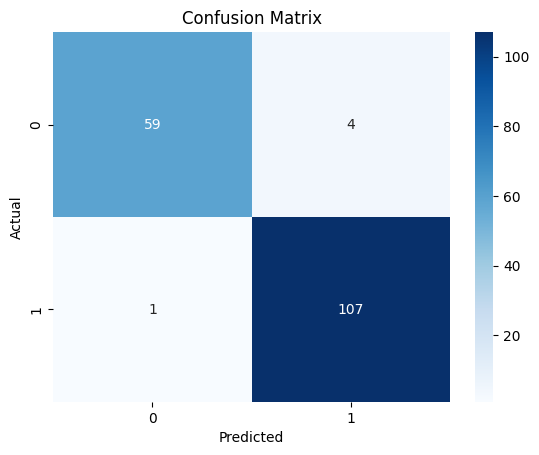

Stacking Classifier Accuracy: 0.9300
Top 5 important features:
mean concave points: 0.1419
worst concave points: 0.1271
worst area: 0.1182
mean concavity: 0.0806
worst radius: 0.0780
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       154
           1       0.89      0.87      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Accuracy with max_depth=None: 0.8867
Accuracy with max_depth=5: 0.8933
Accuracy with max_depth=10: 0.9067
Accuracy with max_depth=20: 0.8867
Accuracy with max_depth=30: 0.8867
Decision Tree Bagging MSE: 4718.4527
KNN Bagging MSE: 8038.4067
ROC-AUC Score: 0.9968
Cross-validation scores: [0.87  0.885 0.895 0.875 0.905]
Mean CV accuracy: 0.8860


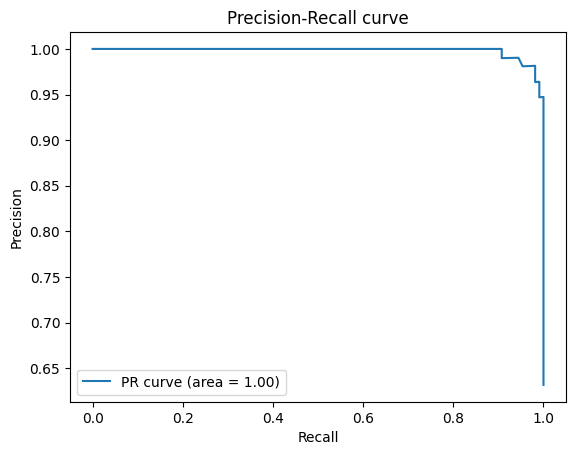

Stacking Classifier Accuracy: 0.8833
MSE with sample size 0.5: 4979.1018
MSE with sample size 0.7: 4868.7432
MSE with sample size 1.0: 4718.4527


In [ ]:
# 31. Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cancer, y_train_cancer)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 32. Bagging Regressor with different n_estimators
for n_est in [10, 50, 100, 200]:
    bag = BaggingRegressor(
        DecisionTreeRegressor(),
        n_estimators=n_est,
        random_state=42
    )
    bag.fit(X_train_reg, y_train_reg)
    y_pred = bag.predict(X_test_reg)
    print(f"MSE with {n_est} estimators: {mean_squared_error(y_test_reg, y_pred):.4f}")

# 33. Analyze misclassified samples
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cancer, y_train_cancer)
y_pred = rf.predict(X_test_cancer)
misclassified = np.where(y_pred != y_test_cancer)[0]
print(f"Number of misclassified samples: {len(misclassified)}")
print("Indices of misclassified samples:", misclassified)

# 34. Compare Bagging with single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_clf, y_train_clf)
dt_pred = dt.predict(X_test_clf)

bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag.fit(X_train_clf, y_train_clf)
bag_pred = bag.predict(X_test_clf)

print(f"Single Decision Tree Accuracy: {accuracy_score(y_test_clf, dt_pred):.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test_clf, bag_pred):.4f}")

# 35. Visualize confusion matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cancer, y_train_cancer)
y_pred = rf.predict(X_test_cancer)
cm = confusion_matrix(y_test_cancer, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 36. Stacking Classifier
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_clf, y_train_clf)
y_pred = stacking_clf.predict(X_test_clf)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_clf, y_pred):.4f}")

# 37. Top 5 important features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cancer, y_train_cancer)
importances = rf.feature_importances_
indices = np.argsort(importances)[-5:][::-1]
print("Top 5 important features:")
for i in indices:
    print(f"{cancer.feature_names[i]}: {importances[i]:.4f}")

# 38. Evaluate Bagging with Precision, Recall, F1
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag.fit(X_train_clf, y_train_clf)
y_pred = bag.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred))

# 39. Effect of max_depth on accuracy
for depth in [None, 5, 10, 20, 30]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train_clf, y_train_clf)
    y_pred = rf.predict(X_test_clf)
    print(f"Accuracy with max_depth={depth}: {accuracy_score(y_test_clf, y_pred):.4f}")

# 40. Bagging Regressor with different base estimators
# Decision Tree
bag_dt = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bag_dt.fit(X_train_reg, y_train_reg)
y_pred_dt = bag_dt.predict(X_test_reg)

# KNN
bag_knn = BaggingRegressor(
    KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)
bag_knn.fit(X_train_reg, y_train_reg)
y_pred_knn = bag_knn.predict(X_test_reg)

print(f"Decision Tree Bagging MSE: {mean_squared_error(y_test_reg, y_pred_dt):.4f}")
print(f"KNN Bagging MSE: {mean_squared_error(y_test_reg, y_pred_knn):.4f}")

# 41. Random Forest ROC-AUC Score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cancer, y_train_cancer)
y_proba = rf.predict_proba(X_test_cancer)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_cancer, y_proba):.4f}")

# 42. Bagging Classifier with cross-validation
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
scores = cross_val_score(bag, X_clf, y_clf, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {np.mean(scores):.4f}")

# 43. Precision-Recall curve
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cancer, y_train_cancer)
y_proba = rf.predict_proba(X_test_cancer)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_cancer, y_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

# 44. Stacking with Random Forest and Logistic Regression
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_clf, y_train_clf)
y_pred = stacking_clf.predict(X_test_clf)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_clf, y_pred):.4f}")

# 45. Bagging Regressor with different bootstrap sample sizes
for sample_size in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(
        DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=sample_size,
        random_state=42
    )
    bag.fit(X_train_reg, y_train_reg)
    y_pred = bag.predict(X_test_reg)
    print(f"MSE with sample size {sample_size}: {mean_squared_error(y_test_reg, y_pred):.4f}")